In [20]:
import geowombat as gw
from geowombat.data import rgbn
import matplotlib.pyplot as plt


Calculate a vegetation index, returning an `Xarray.DataArray`.

In [21]:
with gw.open(rgbn) as ds:
    print(ds)
    evi = ds.gw.evi(sensor='rgbn', scale_factor=0.0001)
    print(evi)

<xarray.DataArray (band: 4, y: 403, x: 515)>
dask.array<open_rasterio-05ae6cf2d6fc281f2298197858778c87<this-array>, shape=(4, 403, 515), dtype=uint8, chunksize=(4, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4
  * x        (x) float64 7.93e+05 7.93e+05 7.93e+05 ... 7.956e+05 7.956e+05
  * y        (y) float64 2.05e+06 2.05e+06 2.05e+06 ... 2.048e+06 2.048e+06
Attributes: (12/14)
    transform:           (5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
    crs:                 32618
    res:                 (5.0, 5.0)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    AREA_OR_POINT:       Area
    DataType:            Generic
    filename:            /Users/tnmthai/miniconda3/lib/python3.10/site-packag...
    resampling:          nearest
    _data_are_separate:  0
    _data_are_stacked:   0
<xarray.DataArray (band: 1, y: 403, x: 515)>
dask.array<where, shape=(1, 403, 515), dt

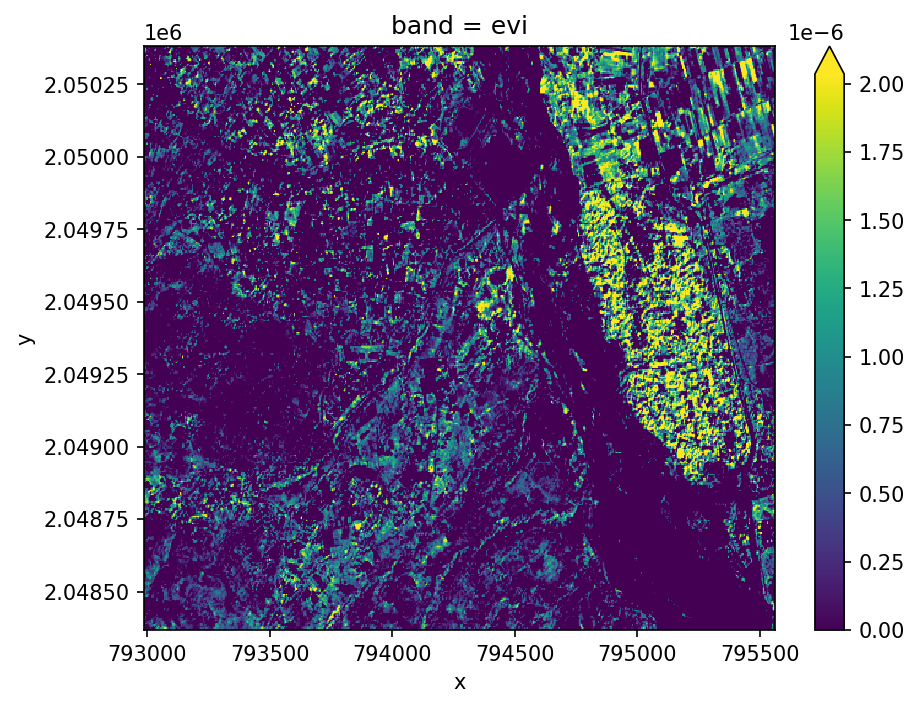

In [22]:
fig, ax = plt.subplots(dpi=150)

with gw.config.update(sensor='rgbn', scale_factor=0.0001):
    with gw.open(rgbn) as ds:
        evi = ds.gw.evi()
        evi.plot(robust=True, ax=ax)
plt.tight_layout(pad=1)

### Two-band Enhanced Vegetation Index (EVI2)
We can also calcuate an approximation of EVI with two bands using $G\times ((NIR-RED)/(L+NIR+C\times Red))$

This allows us to extend EVI calculations back in time using AVHRR, and avoids some problems with the blue band which tends to be noisy.

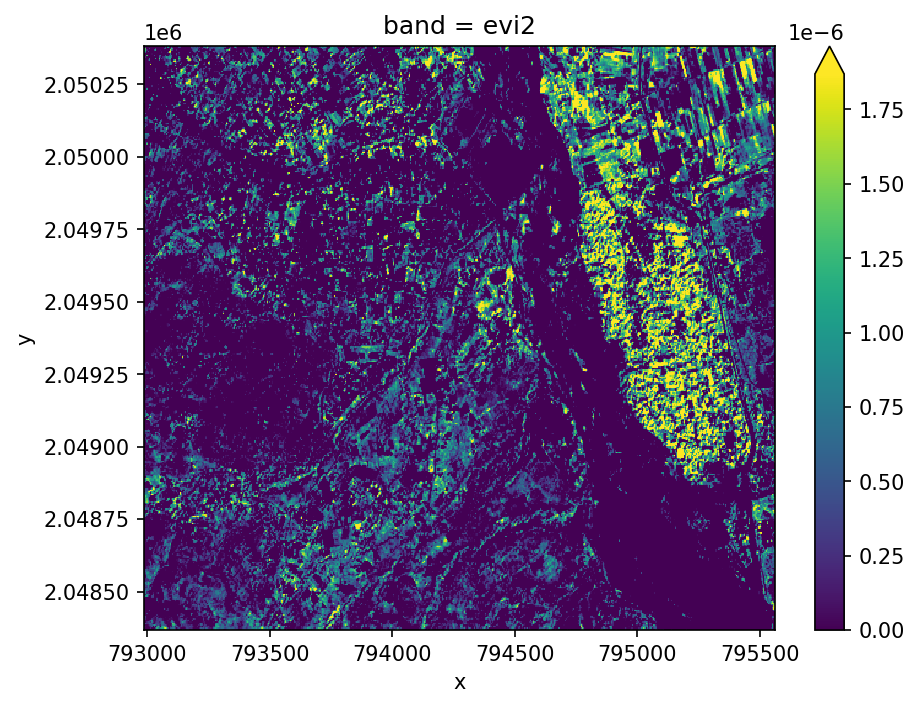

In [23]:
fig, ax = plt.subplots(dpi=150)

with gw.config.update(sensor='rgbn', scale_factor=0.0001):
    with gw.open(rgbn) as ds:
        evi2 = ds.gw.evi2()
        evi2.plot(robust=True, ax=ax)
plt.tight_layout(pad=1)

### Normalized Difference Indices (NDVI)
The simplest vegetation metric is NDVI, which is just the normalized difference between the Red and NIR bands. It is calculated as follows $\frac{NIR-Red}{NIR+Red}$.

We can calculate it using the generic `norm_diff` function for any two-band combination.

In [24]:
with gw.config.update(sensor='rgbn'):
    with gw.open(rgbn) as ds:
        d = ds.gw.norm_diff('red', 'nir')
        print(d)

<xarray.DataArray (band: 1, y: 403, x: 515)>
dask.array<where, shape=(1, 403, 515), dtype=float64, chunksize=(1, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U9 'norm-diff'
  * x        (x) float64 7.93e+05 7.93e+05 7.93e+05 ... 7.956e+05 7.956e+05
  * y        (y) float64 2.05e+06 2.05e+06 2.05e+06 ... 2.048e+06 2.048e+06
Attributes: (12/18)
    transform:           (5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
    crs:                 32618
    res:                 (5.0, 5.0)
    is_tiled:            1
    nodatavals:          (nan,)
    _FillValue:          nan
    ...                  ...
    resampling:          nearest
    _data_are_separate:  0
    _data_are_stacked:   0
    pre-scaling:         1.0
    vi:                  norm-diff
    drange:              (-1, 1)


<xarray.DataArray (band: 3, y: 403, x: 515)>
dask.array<transpose, shape=(3, 403, 515), dtype=float64, chunksize=(3, 64, 64), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 7.93e+05 7.93e+05 7.93e+05 ... 7.956e+05 7.956e+05
  * y        (y) float64 2.05e+06 2.05e+06 2.05e+06 ... 2.048e+06 2.048e+06
  * band     (band) <U10 'brightness' 'greenness' 'wetness'
Attributes: (12/15)
    transform:           (5.0, 0.0, 792988.0, 0.0, -5.0, 2050382.0)
    crs:                 32618
    res:                 (5.0, 5.0)
    is_tiled:            1
    nodatavals:          (nan, nan, nan, nan)
    _FillValue:          nan
    ...                  ...
    DataType:            Generic
    sensor:              Quickbird with 4 (visible + NIR) bands
    filename:            /Users/tnmthai/miniconda3/lib/python3.10/site-packag...
    resampling:          nearest
    _data_are_separate:  0
    _data_are_stacked:   0


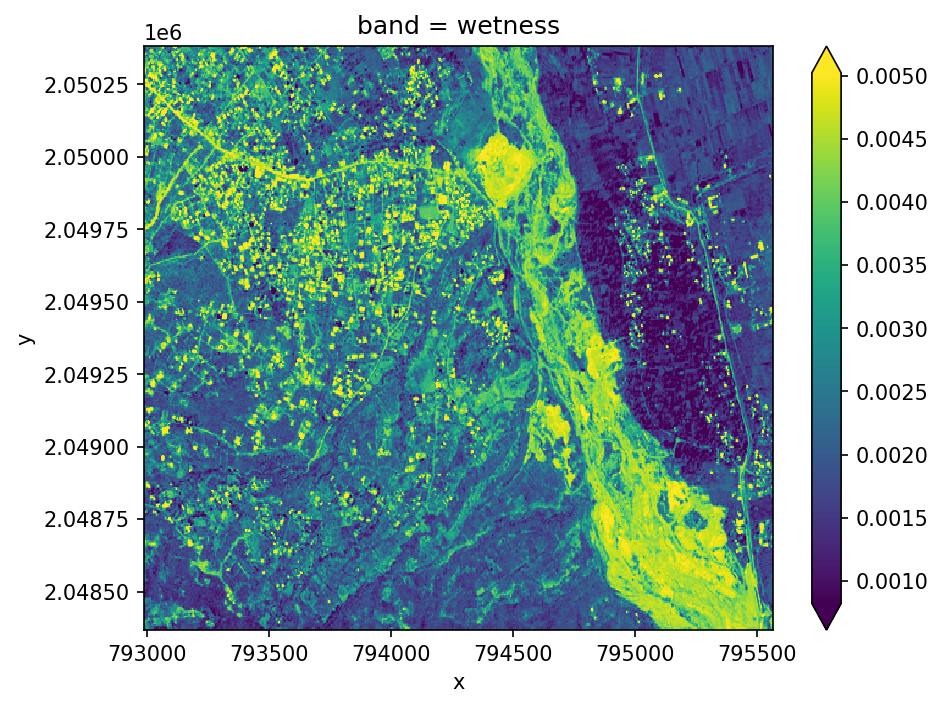

In [25]:
fig, ax = plt.subplots(dpi=150)

with gw.config.update(sensor='qb', scale_factor=0.0001):
    with gw.open(rgbn) as ds:
        tcap = ds.gw.tasseled_cap()
        tcap.sel(band='wetness').plot(robust=True, ax=ax)
        print(tcap)
plt.tight_layout(pad=1)
